<a href="https://colab.research.google.com/github/WilliamZhang20/CuPyNumeric-Practice/blob/master/CuPyNumeric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nvidia-cupynumeric


Trying some "best practices" examples from NVIDIA's website.

In [11]:
import cupynumeric as np

def transform(input):
    return (input + 3) * 4

x = np.linspace(start=0, stop=10, num=11)
print(x)
# Acceptable options
y = transform(x)
# or
y = (x + 3) * 4
print(y)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[12. 16. 20. 24. 28. 32. 36. 40. 44. 48. 52.]


In [13]:
import cupynumeric as np

x_original = x
# Acceptable
x = x + y
y = x - y
x = x * y
print(y)
x = x_original
# Recommended for better performance
np.add(x, y, out=x)
np.subtract(x, y, out=y)
np.multiply(x, y, out=x)
print(y)

[0.00000e+00 3.06000e+02 2.02400e+03 6.80400e+03 1.68960e+04 3.51500e+04
 6.50160e+04 1.10544e+05 1.76384e+05 2.67786e+05 3.90600e+05]
[0.00000e+00 3.06000e+02 2.02400e+03 6.80400e+03 1.68960e+04 3.51500e+04
 6.50160e+04 1.10544e+05 1.76384e+05 2.67786e+05 3.90600e+05]


In [7]:
import cupynumeric as np
print(np.__version__)

25.3.2


CuPyNumeric uses Legate, which is an abstraction layer that allows users to write programs using familiar APIs (like NumPy through its cuPyNumeric library) and have them scale seamlessly from a single CPU to multi-GPU workstations, cloud instances, and even supercomputers without requiring significant code modifications

In [25]:
import cupynumeric as cnp
import numpy as np
import time

def benchmark_matmul(size, num_repeats=10):
    """Benchmarks matrix multiplication for a given size with NumPy and cuPyNumeric."""

    # NumPy benchmark
    A_np = np.random.rand(size, size).astype(np.float32)
    B_np = np.random.rand(size, size).astype(np.float32)
    numpy_times = []
    for _ in range(num_repeats):
        start_time = time.time()
        C_np = np.matmul(A_np, B_np)
        end_time = time.time()
        numpy_times.append(end_time - start_time)
    numpy_mean_time = np.mean(numpy_times)
    print(f"NumPy Matmul (size {size}): Mean time = {numpy_mean_time:.6f} seconds")

    # cuPyNumeric benchmark
    A_gpu = cnp.array(A_np)
    B_gpu = cnp.array(B_np)
    cupy_times = []
    for _ in range(num_repeats):
        start_time = time.time()
        C_gpu = cnp.matmul(A_gpu, B_gpu)
        end_time = time.time()
        cupy_times.append(end_time - start_time)
    cupy_mean_time = np.mean(cupy_times)
    print(f"cuPyNumeric Matmul (size {size}): Mean time = {cupy_mean_time:.6f} seconds")

    speedup = numpy_mean_time / cupy_mean_time if cupy_mean_time > 0 else float('inf')
    print(f"Speedup (NumPy / cuPyNumeric): {speedup:.2f}x")
    print("-" * 40)

if __name__ == "__main__":
    matrix_sizes = [64, 256, 1024, 4096]  # Test with different matrix sizes
    num_repeats = 5  # Number of times to run each matmul for averaging

    print("Benchmarking NumPy vs. cuPyNumeric Matrix Multiplication:")
    for size in matrix_sizes:
        benchmark_matmul(size, num_repeats)

Benchmarking NumPy vs. cuPyNumeric Matrix Multiplication:
NumPy Matmul (size 64): Mean time = 0.000030 seconds
cuPyNumeric Matmul (size 64): Mean time = 0.000359 seconds
Speedup (NumPy / cuPyNumeric): 0.08x
----------------------------------------
NumPy Matmul (size 256): Mean time = 0.002401 seconds
cuPyNumeric Matmul (size 256): Mean time = 0.003955 seconds
Speedup (NumPy / cuPyNumeric): 0.61x
----------------------------------------
NumPy Matmul (size 1024): Mean time = 0.018515 seconds
cuPyNumeric Matmul (size 1024): Mean time = 0.000475 seconds
Speedup (NumPy / cuPyNumeric): 38.95x
----------------------------------------
NumPy Matmul (size 4096): Mean time = 1.098204 seconds
cuPyNumeric Matmul (size 4096): Mean time = 0.001641 seconds
Speedup (NumPy / cuPyNumeric): 669.04x
----------------------------------------


Another cool thing about CuPyNumeric...graphics & math! The below took only 5 seconds!

Computing Mandelbrot set on GPU (light version)...


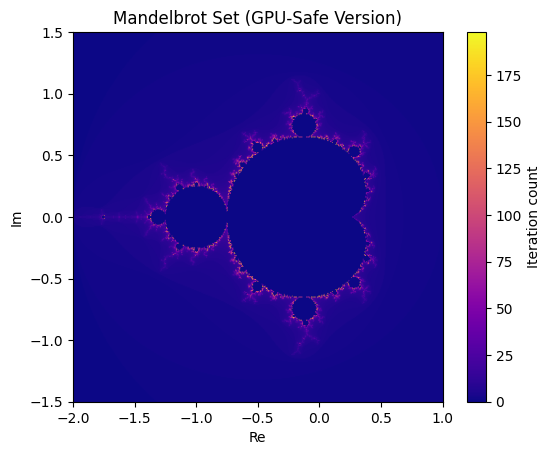

In [3]:
import cupynumeric as np
import numpy as onp
import matplotlib.pyplot as plt

def mandelbrot(width=600, height=400, x_min=-2.0, x_max=1.0, y_min=-1.5, y_max=1.5, max_iter=200):
    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y
    Z = np.zeros_like(C)
    output = np.zeros(C.shape, dtype=np.int32)

    for i in range(max_iter):
        mask = np.abs(Z) <= 2
        Z[mask] = Z[mask] * Z[mask] + C[mask]
        output[mask & (np.abs(Z) > 2)] = i

    return output

# Compute safely on GPU
print("Computing Mandelbrot set on GPU...")
image_gpu = mandelbrot()

# Move result to CPU safely
image_cpu = onp.array(image_gpu)

# Plot
plt.imshow(image_cpu, cmap='plasma', extent=[-2, 1, -1.5, 1.5])
plt.colorbar(label="Iteration count")
plt.title("Mandelbrot Set")
plt.xlabel("Re")
plt.ylabel("Im")
plt.show()

Finally, object detection too!

In [3]:
!curl https://static01.nyt.com/images/2022/03/13/arts/13godfather-pacino1/merlin_203043024_2d87c8a6-318e-4d82-afc7-0b00cea6b7af-superJumbo.jpg > godfather.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  470k  100  470k    0     0  5263k      0 --:--:-- --:--:-- --:--:-- 5283k


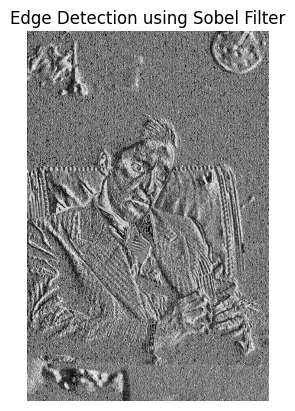

In [4]:
import cupynumeric as np
import numpy as onp
import matplotlib.pyplot as plt
from PIL import Image

# Example 2D image (e.g., grayscale image)
image = Image.open("godfather.jpg").convert("L")

# Sobel filter for edge detection
sobel_kernel = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])

# Convert to NumPy array (on CPU)
img_array_cpu = onp.array(image)

# Transfer to GPU
img_array_gpu = np.array(img_array_cpu)

# Perform convolution
convolved = np.convolve(image, sobel_kernel, mode='same', method='auto')

# Convert result to CPU for visualization
convolved_cpu = onp.array(convolved)

# Display the result
plt.imshow(convolved_cpu, cmap='gray')
plt.title('Edge Detection using Sobel Filter')
plt.axis('off')
plt.show()